In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'retina'


= PythonFindSolution                                     =
= Created by Константин Шмирко on 2021-01-07.            =
= Copyright 2021 Константин Шмирко. All rights reserved. =

= Параметры запуска расчетов = 

depolarization_count          	=	0
discrepancy_kind              	=	0
extinction_count              	=	2
funct_type                    	=	0
generations_count             	=	700
input_fname                   	=	input1.dat
iterations_count              	=	40000
knots_count                   	=	22
meas_vector                   	=	[0.01079 0.00969 0.00593 0.18941 0.15298]
params_hi_boundary            	=	[-20.     0.8    0.8    1.69  -3.  ]
params_lo_boundary            	=	[-27.     0.15   0.05   1.3  -16.  ]
r_max                         	=	5.0
r_min                         	=	0.05
threshold                     	=	45.0
wavelengths                   	=	[0.355 0.532 1.064]
wavelengths_count             	=	3

LOADING DATABASE OF SPHEROIDS...
...DONE

 =   Результаты расчетов.     =



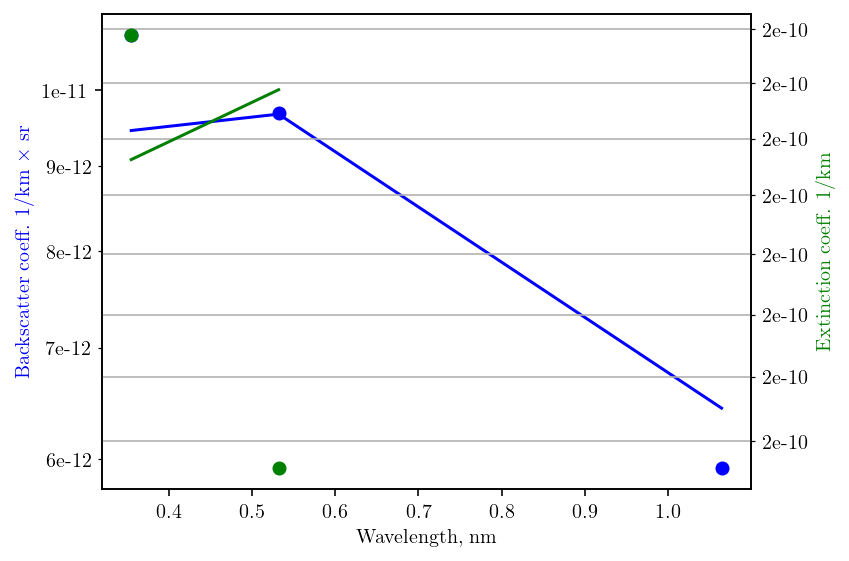

<Figure size 432x288 with 0 Axes>

In [3]:
%run -i main.py config.yaml

In [5]:
def ln_func(r, N, rm, s):
    A = N/(np.sqrt(2*np.pi)*r*s)
    B = np.exp(-0.5*((np.log(r)-(np.log(rm)))/s)**2)
    return A*B

In [6]:
import numpy as np

In [7]:
rn = np.logspace(np.log10(0.05), np.log10(15))

In [8]:
Y1 = ln_func(rn, 6.23e-11, 0.486, 0.15)

In [9]:
Y2 = ln_func(rn, np.exp(-24.33), 0.4848, 0.4787)

In [45]:
from matplotlib import pyplot as plt

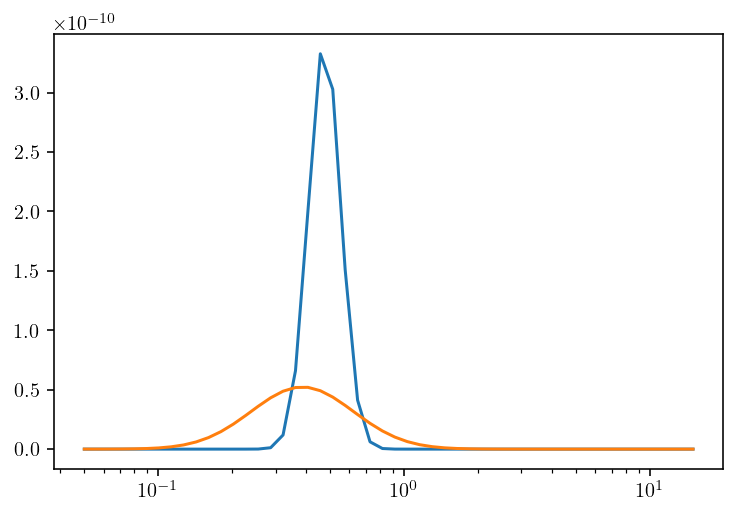

In [10]:
plt.semilogx(rn, Y1, rn, Y2)

In [14]:
aX = np.log([0.355, 0.532, 1.064])
aY = np.log([ 1.079e-02, 9.690e-03, 5.930e-03])

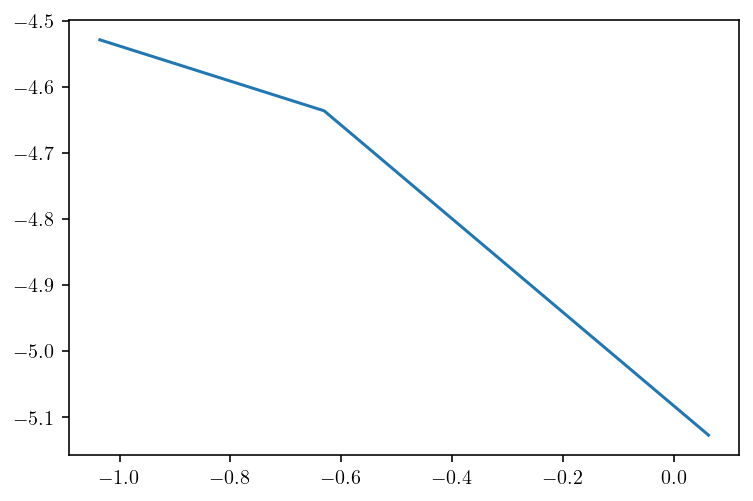

In [15]:
plt.plot(aX, aY)

In [19]:
coefs=np.polyfit(aX, aY, deg=1)

In [23]:
nX = np.log(np.array([0.355, 0.4, 0.532, 0.6, 0.8, 1.064]))
nY=np.exp(np.polyval(coefs, nX))

Text(0, 0.5, '$\\beta_{\\pi}, 1/km\\times sr$')

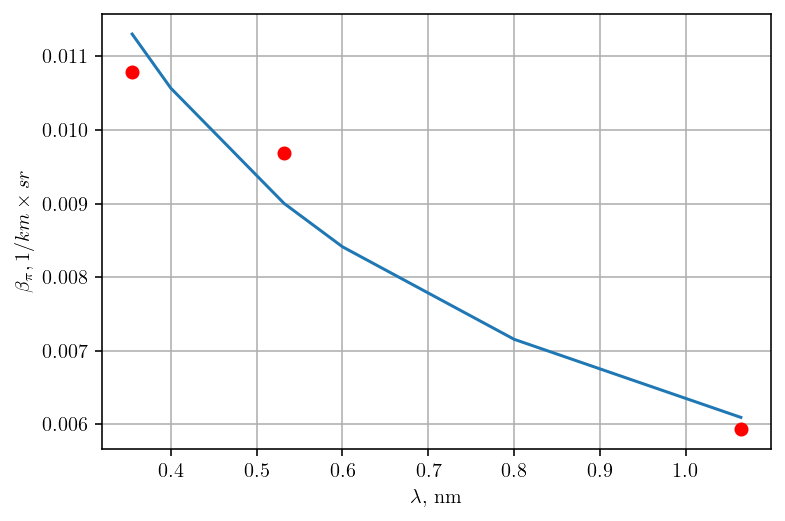

In [29]:
plt.plot(np.exp(nX), nY)
plt.plot(np.exp(aX), np.exp(aY), 'ro')
plt.grid(which='both')
plt.xlabel(r'$\lambda$, nm')
plt.ylabel(r'$\beta_{\pi}, 1/km\times sr$')

In [30]:
bX=np.log([0.355, 0.532])
bY=np.log([1.894e-01,1.530e-01])
coefs1=np.polyfit(bX, bY, deg=1)
#nX = np.log(np.array([0.355, 0.4, 0.532, 0.6, 0.8, 1.064]))
nY1=np.exp(np.polyval(coefs1, nX))

Text(0, 0.5, '$\\alpha, 1/km$')

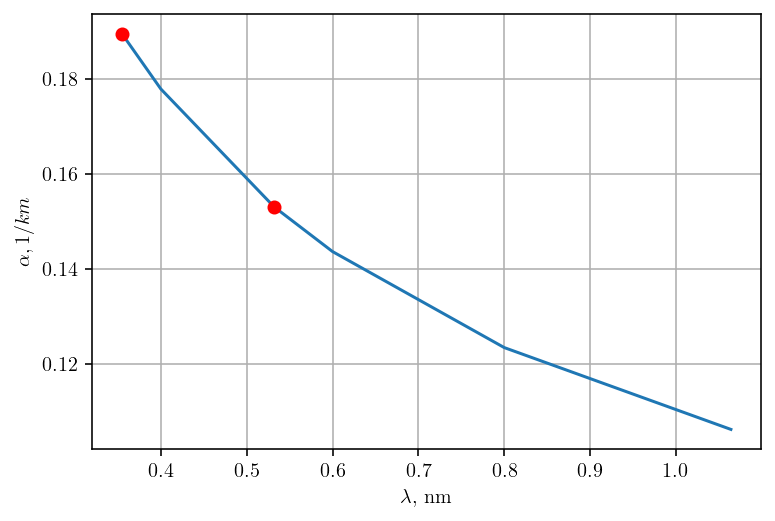

In [33]:
plt.plot(np.exp(nX), nY1)
plt.plot(np.exp(bX), np.exp(bY), 'ro')
plt.grid(which='both')
plt.xlabel(r'$\lambda$, nm')
plt.ylabel(r'$\alpha, 1/km$')

In [34]:
nY1/nY

array([16.75524472, 16.82616999, 16.99686403, 17.0693796 , 17.24406855,
       17.41900199])

In [35]:
coefs, coefs1

(array([-0.56298225, -5.06565095]), array([-0.52758888, -2.21028492]))

In [37]:
np.exp(-5.06565095), np.exp(-2.21028492)

(0.006309802199927377, 0.10966939705903028)

In [38]:
%load_ext cython

In [41]:
%%cython
from __future__ import print_function

from cpython.ref cimport PyObject

import sys

python_dict = {"abc": 123}
python_dict_refcount = sys.getrefcount(python_dict)

cdef owned_reference(object obj):
    refcount = sys.getrefcount(python_dict)
    print('Inside owned_reference: {refcount}'.format(refcount=refcount))

cdef borrowed_reference(PyObject * obj):
    refcount = obj.ob_refcnt
    print('Inside borrowed_reference: {refcount}'.format(refcount=refcount))

print('Initial refcount: {refcount}'.format(refcount=python_dict_refcount))
owned_reference(python_dict)
borrowed_reference(<PyObject *>python_dict)

Initial refcount: 2
Inside owned_reference: 3
Inside borrowed_reference: 2
